In [1]:
import tensorflow as tf
import numpy as np
import os

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

In [3]:
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3,3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 128)               3965056   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,989,642
Trainable params: 3,989,642
Non-

In [5]:
!nvidia-smi

Mon Aug 29 16:25:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.15       Driver Version: 512.15       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:0B:00.0  On |                  N/A |
|  0%   46C    P2   123W / 420W |  22784MiB / 24576MiB |     94%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 8s 3ms/step - loss: 0.4604 - accuracy: 0.8362 - val_loss: 0.3858 - val_accuracy: 0.8593
Epoch 2/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3342 - accuracy: 0.8788 - val_loss: 0.4968 - val_accuracy: 0.8329
Epoch 3/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2794 - accuracy: 0.8971 - val_loss: 0.3729 - val_accuracy: 0.8699
Epoch 4/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2379 - accuracy: 0.9124 - val_loss: 0.4088 - val_accuracy: 0.8687
Epoch 5/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2044 - accuracy: 0.9232 - val_loss: 0.4283 - val_accuracy: 0.8668
Epoch 6/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1823 - accuracy: 0.9329 - val_loss: 0.4623 - val_accuracy: 0.8613
Epoch 7/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1596 - accuracy: 0.9394 - val_loss: 0.5302 - val_accuracy:

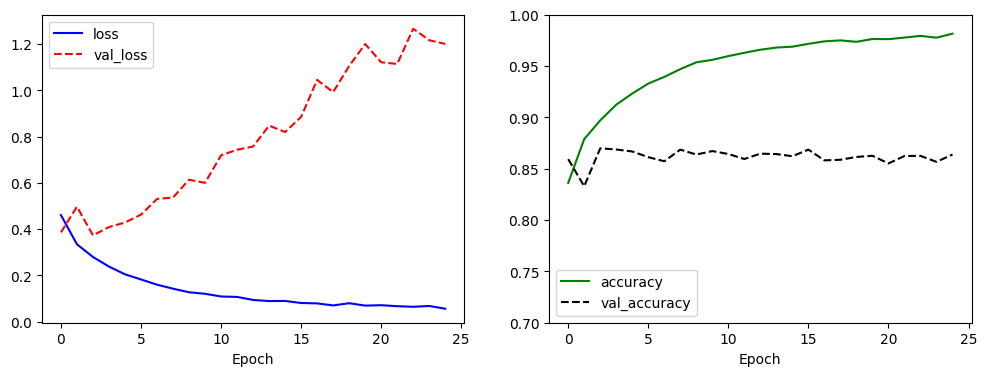

[1.2646150588989258, 0.8614000082015991]

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3,3), filters=16),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [9]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.5646 - accuracy: 0.7949 - val_loss: 0.3992 - val_accuracy: 0.8531
Epoch 2/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3892 - accuracy: 0.8595 - val_loss: 0.3553 - val_accuracy: 0.8656
Epoch 3/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3400 - accuracy: 0.8779 - val_loss: 0.3290 - val_accuracy: 0.8768
Epoch 4/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3149 - accuracy: 0.8858 - val_loss: 0.3367 - val_accuracy: 0.8766
Epoch 5/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2903 - accuracy: 0.8964 - val_loss: 0.2927 - val_accuracy: 0.8919
Epoch 6/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2741 - accuracy: 0.8994 - val_loss: 0.2908 - val_accuracy: 0.8934
Epoch 7/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2629 - accuracy: 0.9023 - val_loss: 0.2905 - val_accuracy:

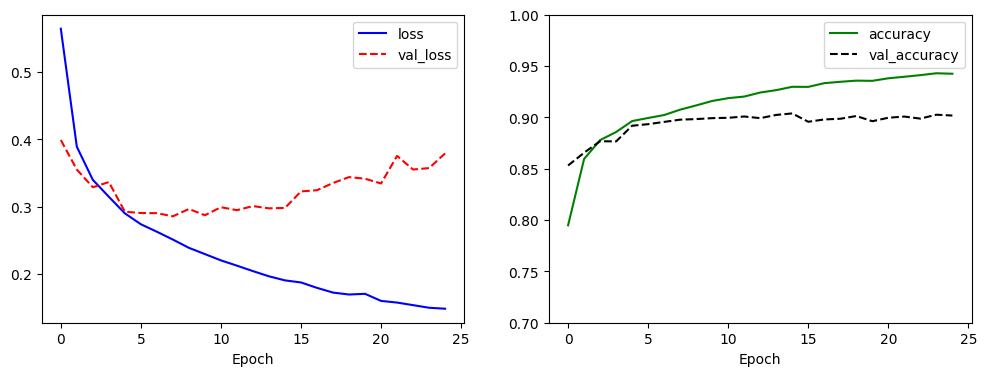

[0.40925875306129456, 0.8978999853134155]

In [10]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 256)       295168    
                                                      

In [13]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5783 - accuracy: 0.7897 - val_loss: 0.3474 - val_accuracy: 0.8765
Epoch 2/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3640 - accuracy: 0.8702 - val_loss: 0.3003 - val_accuracy: 0.8873
Epoch 3/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3273 - accuracy: 0.8841 - val_loss: 0.2660 - val_accuracy: 0.9001
Epoch 4/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3020 - accuracy: 0.8911 - val_loss: 0.2569 - val_accuracy: 0.9099
Epoch 5/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2845 - accuracy: 0.8979 - val_loss: 0.2295 - val_accuracy: 0.9159
Epoch 6/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2746 - accuracy: 0.9006 - val_loss: 0.2212 - val_accuracy: 0.9191
Epoch 7/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2652 - accuracy: 0.9029 - val_loss: 0.2357 - val_accuracy:

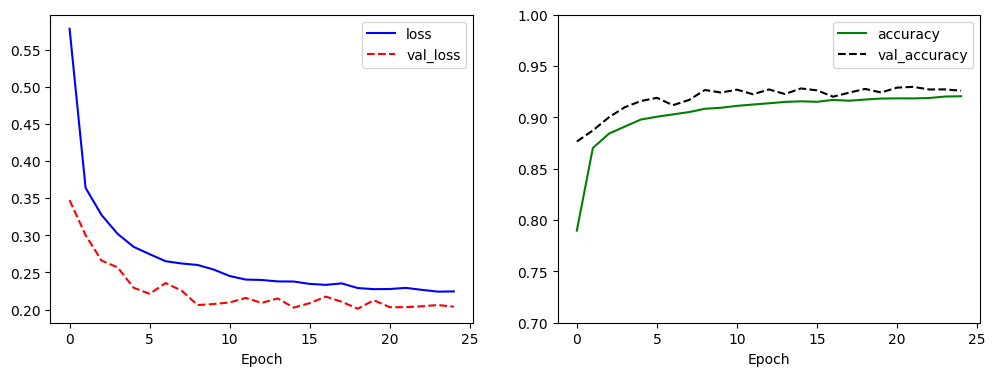

[0.21429306268692017, 0.9239000082015991]

In [14]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
                                        rotation_range=10,
                                        zoom_range=0.10,
                                        shear_range=0.5,
                                        width_shift_range=0.10,
                                        height_shift_range=0.10,
                                        horizontal_flip=True,
                                        vertical_flip=False)

augment_size=100

x_augmented = image_generator.flow(np.tile(train_X[0].reshape(28*28), 100).reshape(-1, 28, 28, 1), np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

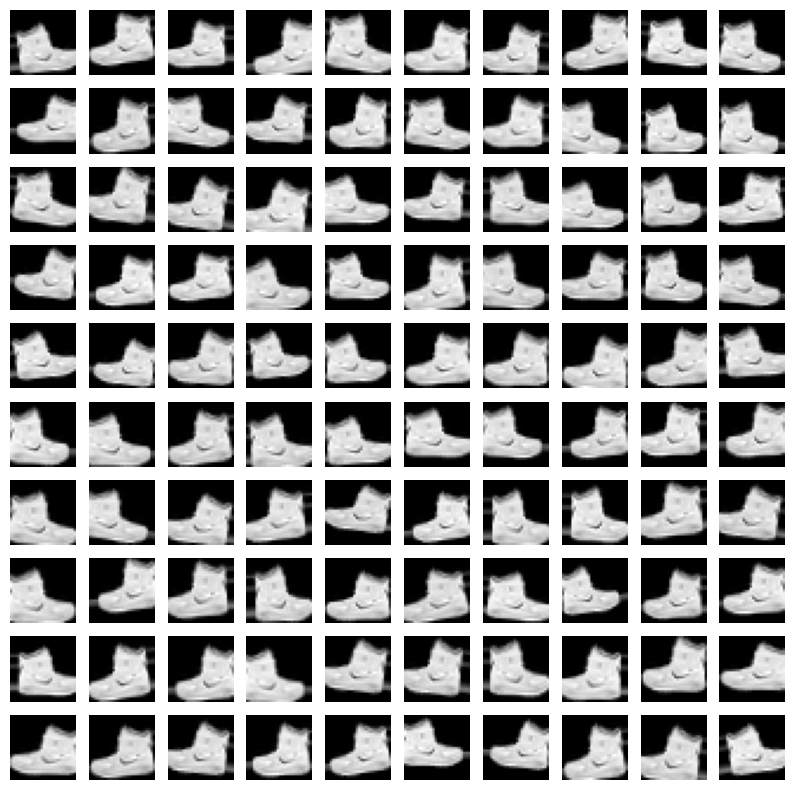

In [18]:
plt.figure(figsize=(10, 10))
for c in range(100):
    plt.subplot(10, 10, c+1)
    plt.axis('off')
    plt.imshow(x_augmented[c].reshape(28,28),cmap='gray')

plt.show()

In [19]:
image_generator = ImageDataGenerator(
                                        rotation_range=10,
                                        zoom_range=0.10,
                                        shear_range=0.5,
                                        width_shift_range=0.10,
                                        height_shift_range=0.10,
                                        horizontal_flip=True,
                                        vertical_flip=False)

augment_size=30000

randidx = np.random.randint(train_X.shape[0], size=augment_size)
x_augmented = train_X[randidx].copy()
y_augmented = train_Y[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size=augment_size, shuffle=False).next()[0]

traub_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_Y, y_augmented))

print(train_X.shape)

(60000, 28, 28, 1)


In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 256)       295168    
                                                      

In [21]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.5887 - accuracy: 0.7856 - val_loss: 0.3431 - val_accuracy: 0.8751
Epoch 2/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3708 - accuracy: 0.8670 - val_loss: 0.2813 - val_accuracy: 0.8941
Epoch 3/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3265 - accuracy: 0.8833 - val_loss: 0.2669 - val_accuracy: 0.9010
Epoch 4/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3033 - accuracy: 0.8915 - val_loss: 0.2460 - val_accuracy: 0.9091
Epoch 5/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2922 - accuracy: 0.8937 - val_loss: 0.2446 - val_accuracy: 0.9105
Epoch 6/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2756 - accuracy: 0.9024 - val_loss: 0.2305 - val_accuracy: 0.9172
Epoch 7/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2733 - accuracy: 0.9024 - val_loss: 0.2594 - val_accuracy:

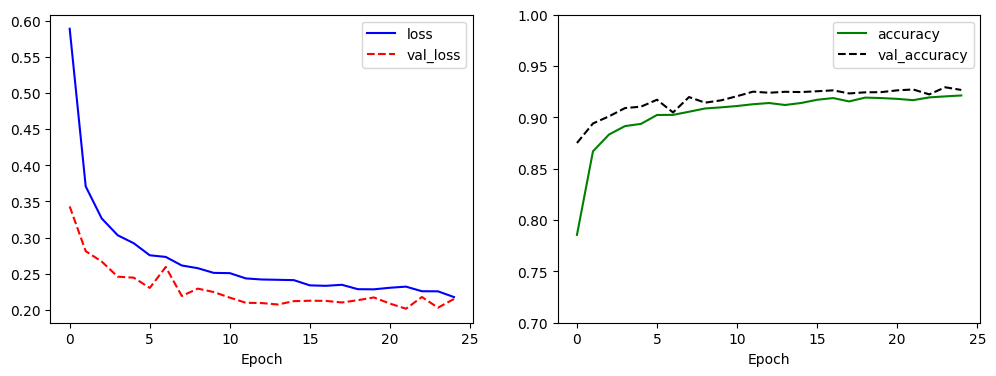

[0.22887490689754486, 0.9218999743461609]

In [22]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

(-0.5, 27.5, 27.5, -0.5)

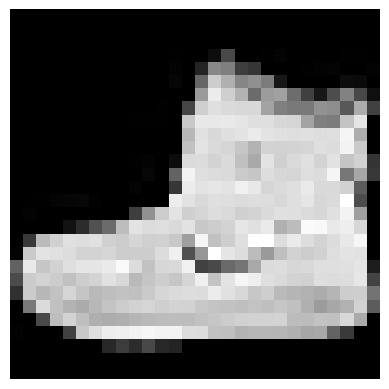

In [25]:
plt.imshow(train_X[0], cmap='gray')
plt.axis('off')